In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import fsolve

In [68]:
data = pd.read_csv('биения 1.txt', sep='	',)
#data = data[['Time', 'wz']'

In [3]:
data_2 = pd.read_csv('биения 2.txt', sep='	',)

In [69]:
data.head(10)

,Time,wz
"0,0",183,NaN
"0,005",171,NaN
"0,01",129,NaN
"0,015",102,NaN
"0,02",75,NaN
"0,025",38,NaN
"0,03",-19,NaN
"0,035",-63,NaN
"0,04",-132,NaN
"0,045",-141,NaN


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21313 entries, 0,0 to 106,56
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    21313 non-null  int64  
 1   wz      0 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 499.5+ KB


In [57]:
data.describe()

,Time,wz
count,21313.000000,0.0
mean,6.706283,NaN
std,2314.340790,NaN
min,-6715.000000,NaN
25%,-1536.000000,NaN
50%,9.000000,NaN
75%,1628.000000,NaN
max,6765.000000,NaN


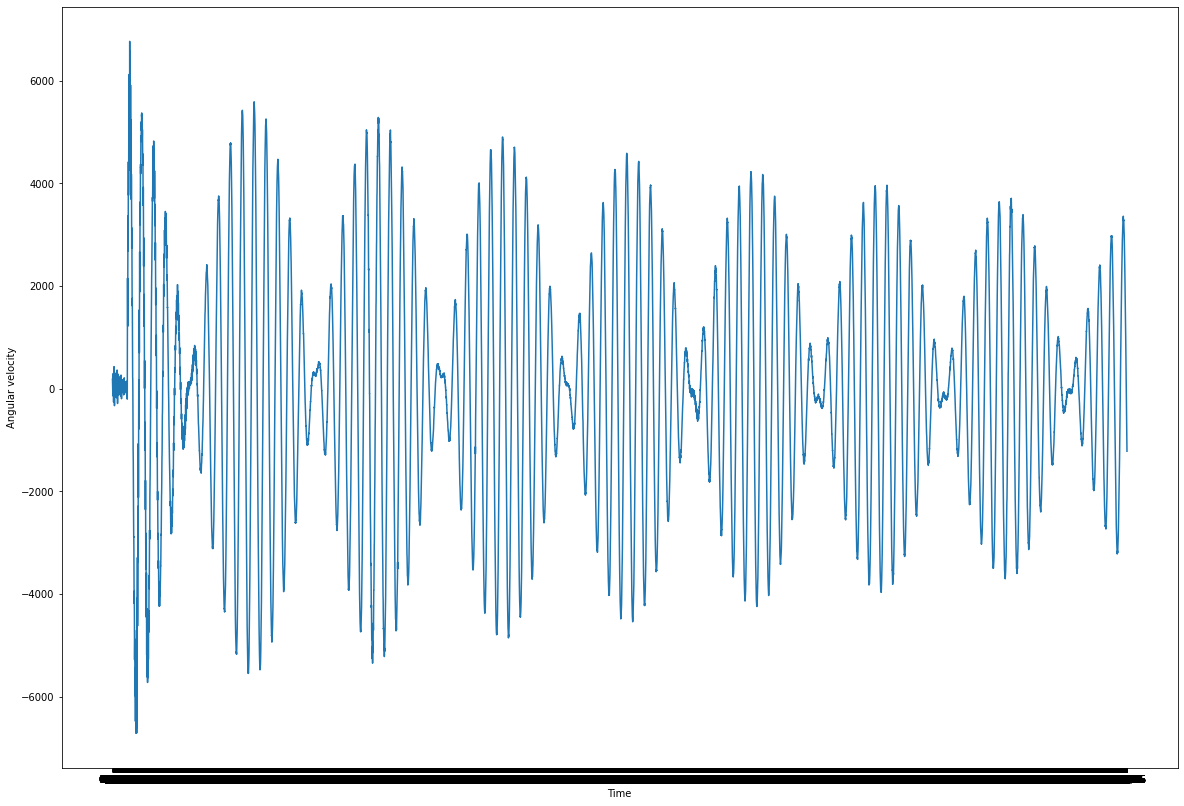

In [76]:
plt.figure(figsize = (20, 14))
plt.plot(data['Time'].index, data['Time'])
plt.xlabel('Time')
plt.ylabel('Angular velocity')
plt.show()

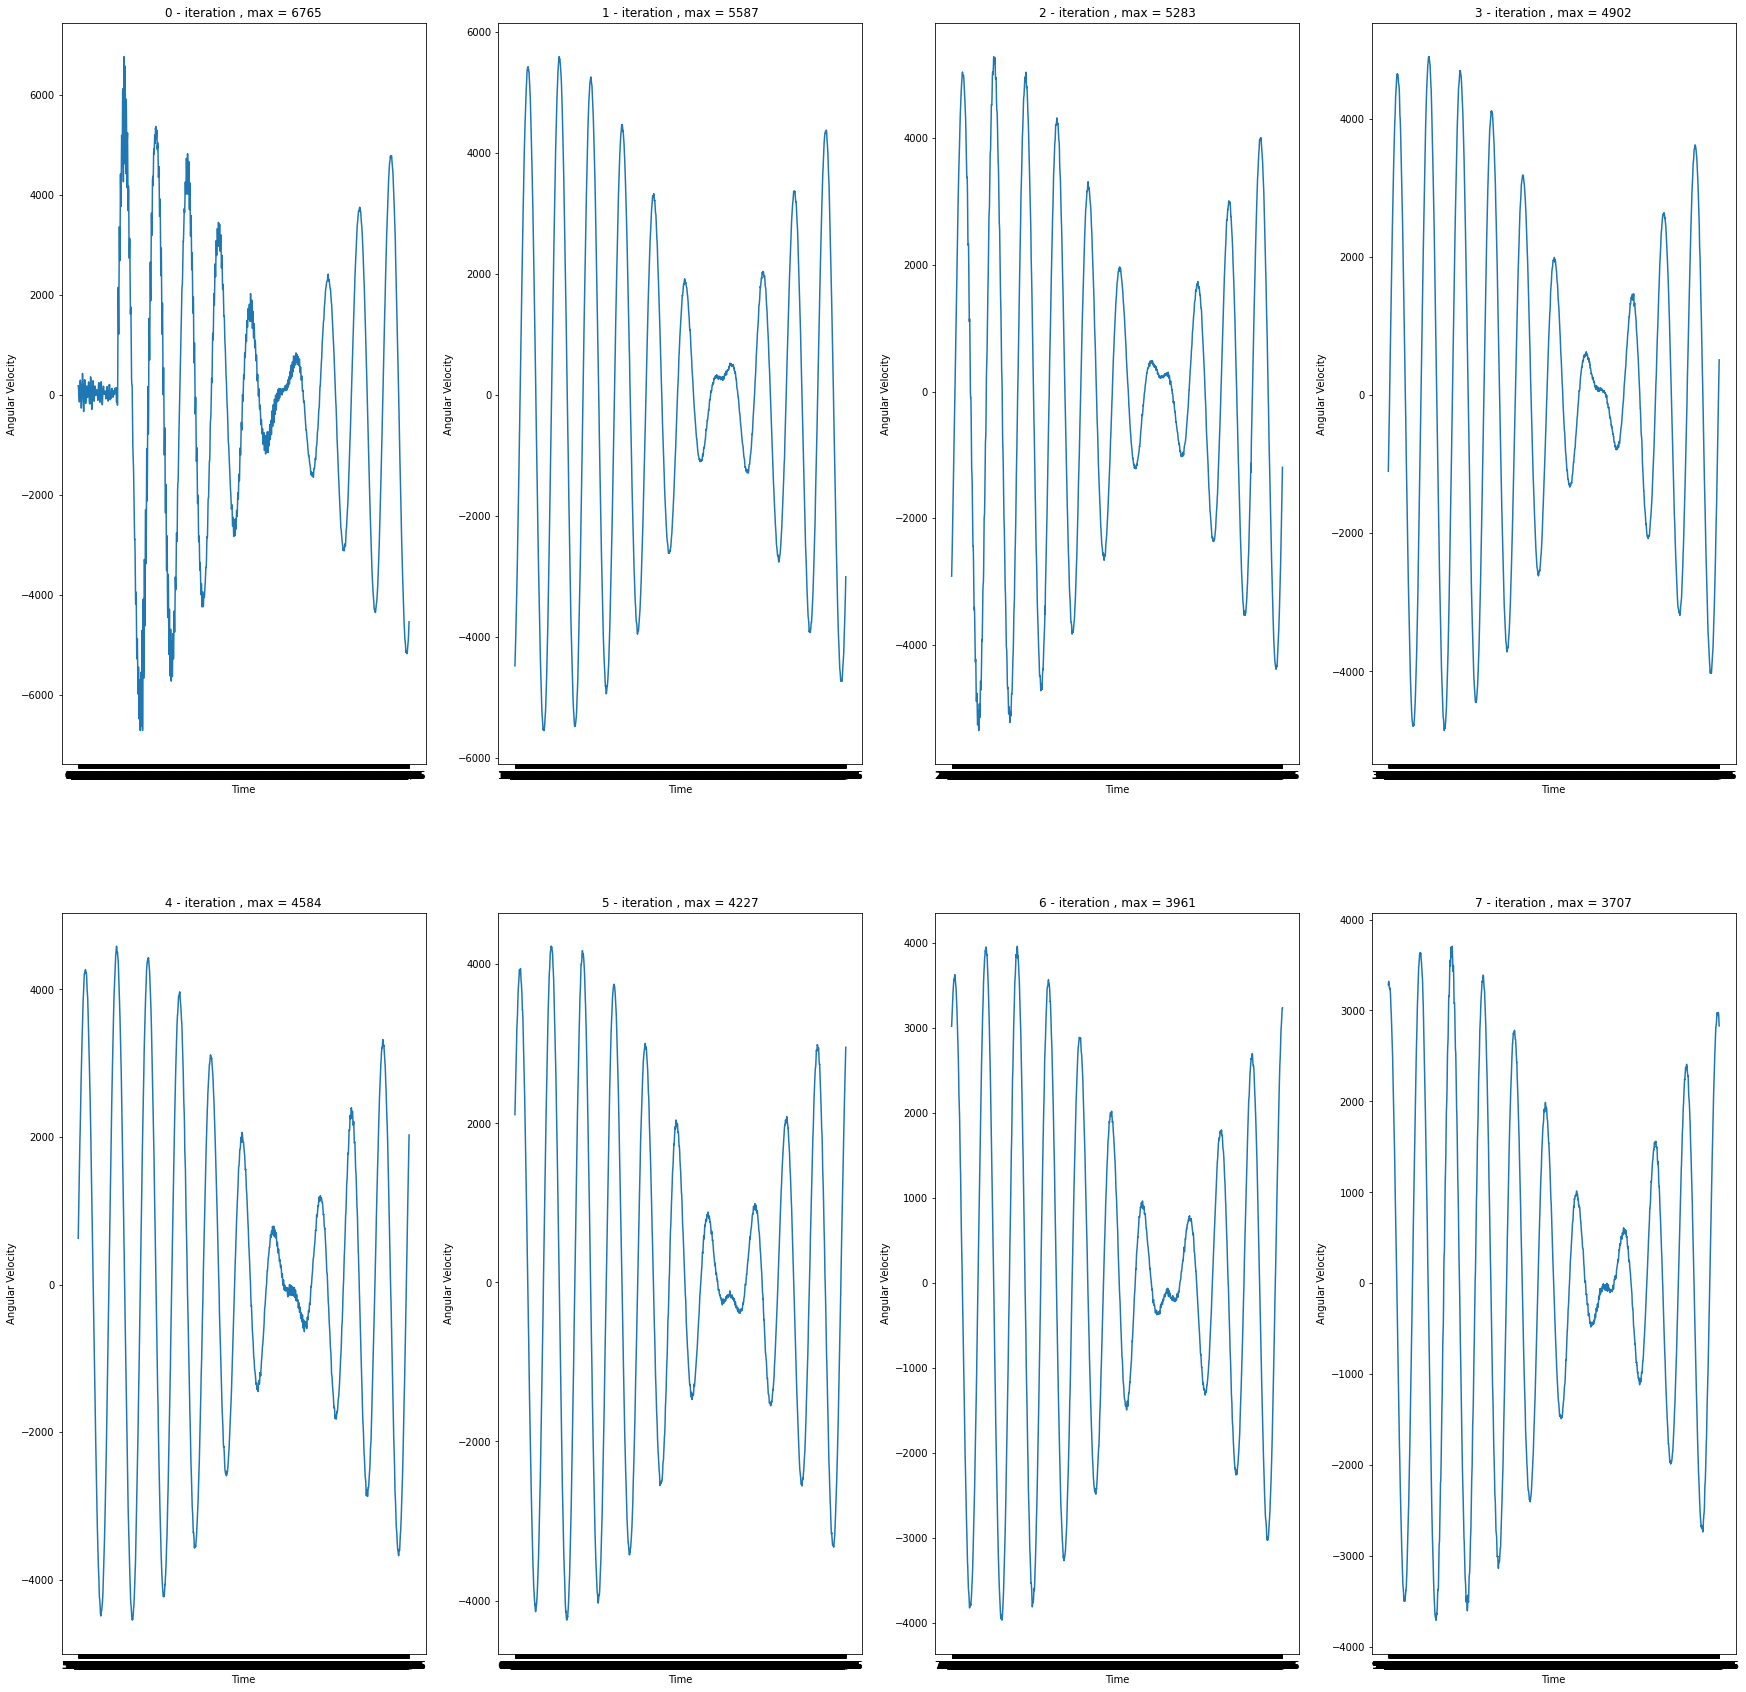

In [126]:
figure, ax = plt.subplots(figsize = (30, 30), nrows = 2, ncols = 4)

shape_ = data.shape[0]
peaks_y  = []
peaks_x  = []
downs_y  = []
downs_x  = []

for i in range(8):
    ax[i // 4][i % 4].plot(data['Time'][i * 2625:(i+1) * 2625].index, data['Time'][i * 2625:(i+1) * 2625])
    ax[i // 4][i % 4].set_title(str(i) + ' - iteration ' + ', ' + 'max = ' + str(data['Time'][i * 2625:(i+1) * 2625].max()))

    peaks_y.append(float(str(data['Time'][i * 2625:(i+1) * 2625].max()).replace(',', '.')))
    peaks_x.append(float(str(data['Time'][i * 2625:(i+1) * 2625].idxmax()).replace(',', '.')))
    downs_y.append(float(str(data['Time'][i * 2625:(i+1) * 2625].min()).replace(',', '.')))
    downs_x.append(float(str(data['Time'][i * 2625:(i+1) * 2625].idxmin()).replace(',', '.')))

    ax[i // 4][i % 4].set_xlabel('Time')
    ax[i // 4][i % 4].set_ylabel('Angular Velocity')
plt.show()

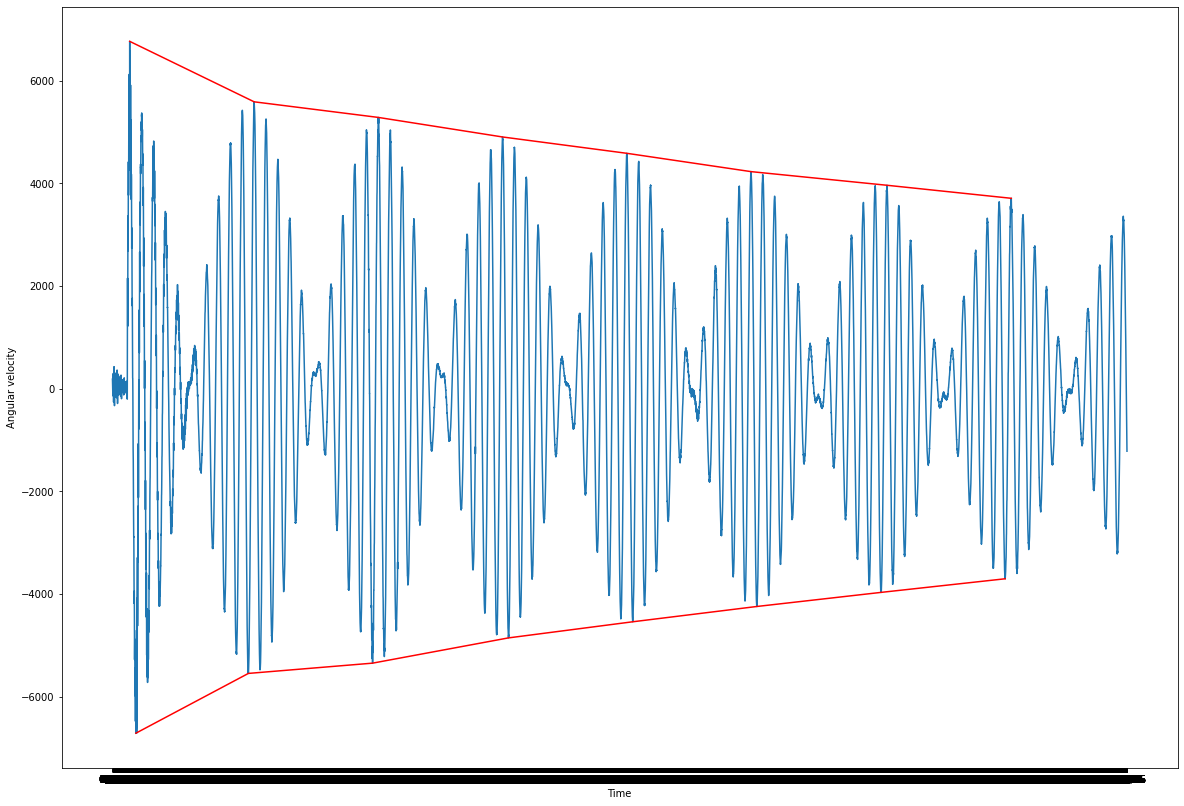

In [102]:
plt.figure(figsize = (20, 14))
plt.plot(data['Time'].index, data['Time'], label = 'Angular Velocity(t)')
plt.plot(peaks_x, peaks_y, label = 'Limits', color = 'red')
plt.plot(downs_x, downs_y, label = 'Limits', color = 'red')
plt.xlabel('Time')
plt.ylabel('Angular velocity')
plt.show()

In [163]:
print(peaks_x)

[1.815, 14.885, 27.925, 40.975, 54.02, 67.065, 81.35, 94.41]


-161.72799257984573 -0.006183221494611059


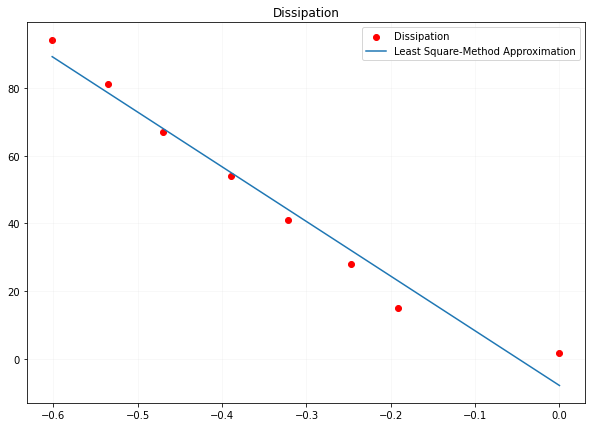

In [176]:
plt.figure(figsize = (10, 7))
plt.scatter(np.log(np.array(peaks_y) / peaks_y[0]), peaks_x, label = 'Dissipation', color = 'red')
k = np.polyfit(np.log(np.array(peaks_y) / peaks_y[0]), peaks_x, deg = 1)
yn = np.poly1d(k)
plt.plot(np.log(np.array(peaks_y) / peaks_y[0]),yn(np.log(np.array(peaks_y) / peaks_y[0])), label = 'Least Square-Method Approximation')
plt.title('Dissipation')
print(k[0], 1/k[0])
plt.legend()
plt.grid(alpha = 0.1)

In [4]:
data_2.shape

(21314, 2)

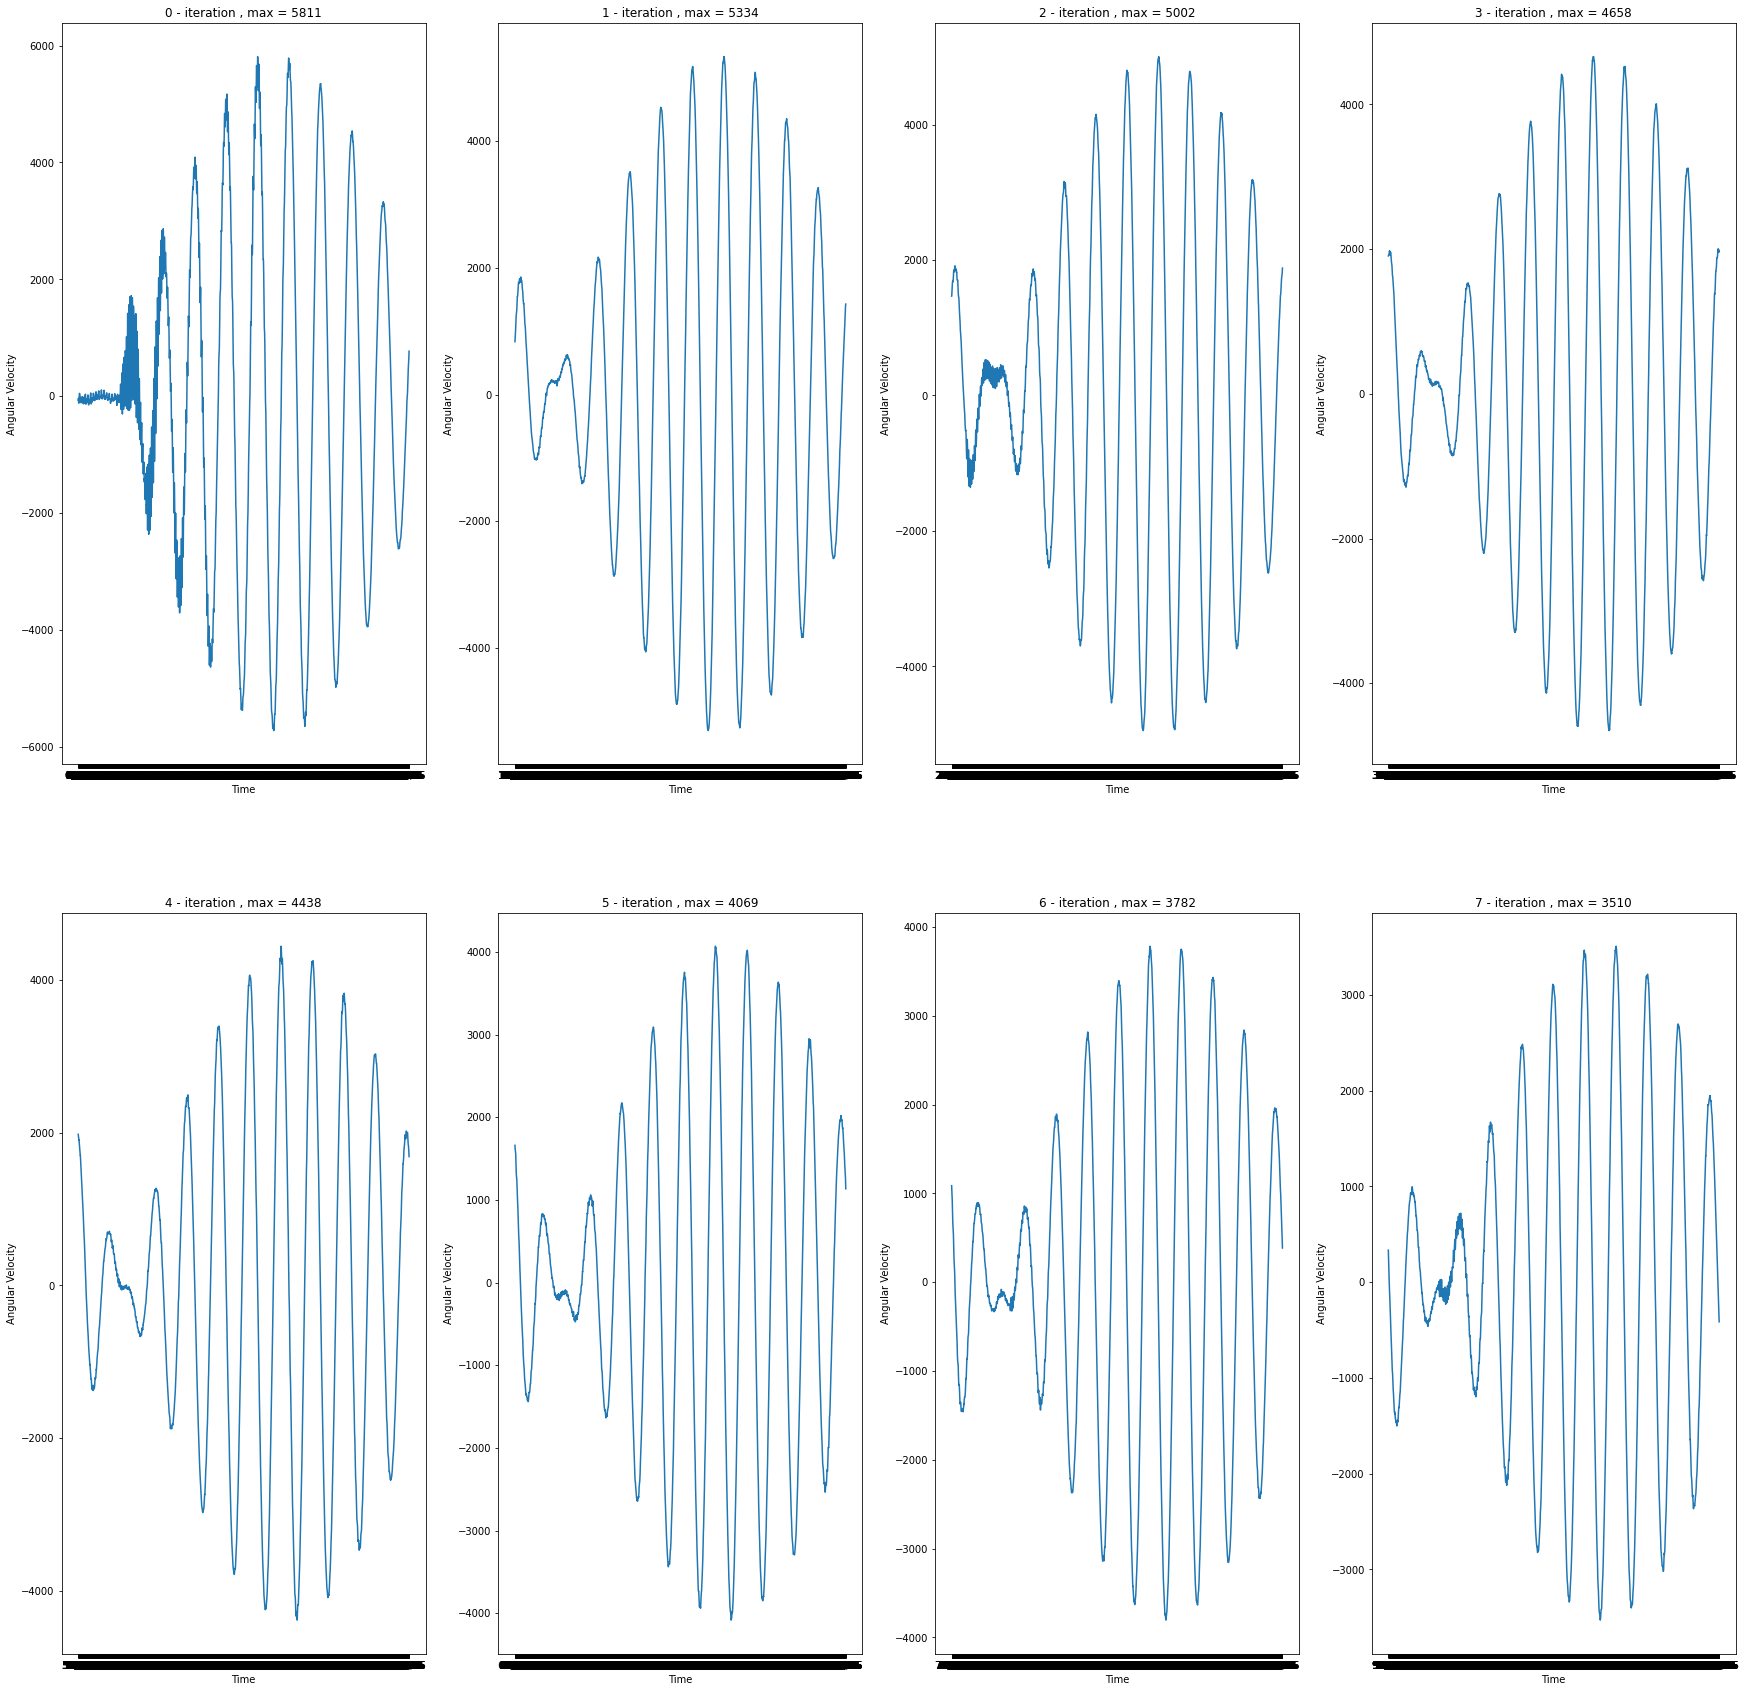

In [6]:
figure, ax = plt.subplots(figsize = (30, 30), nrows = 2, ncols = 4)

shape_ = data_2.shape[0]
peaks_y_2  = []
peaks_x_2  = []
downs_y_2  = []
downs_x_2  = []

for i in range(8):
    ax[i // 4][i % 4].plot(data_2['Time'][i * 2625:(i+1) * 2625].index, data_2['Time'][i * 2625:(i+1) * 2625])
    ax[i // 4][i % 4].set_title(str(i) + ' - iteration ' + ', ' + 'max = ' + str(data_2['Time'][i * 2625:(i+1) * 2625].max()))

    peaks_y_2.append(float(str(data_2['Time'][i * 2625:(i+1) * 2625].max()).replace(',', '.')))
    peaks_x_2.append(float(str(data_2['Time'][i * 2625:(i+1) * 2625].idxmax()).replace(',', '.')))
    downs_y_2.append(float(str(data_2['Time'][i * 2625:(i+1) * 2625].min()).replace(',', '.')))
    downs_x_2.append(float(str(data_2['Time'][i * 2625:(i+1) * 2625].idxmin()).replace(',', '.')))

    ax[i // 4][i % 4].set_xlabel('Time')
    ax[i // 4][i % 4].set_ylabel('Angular Velocity')
plt.show()

-187.72841512484203 -0.005326844097282694


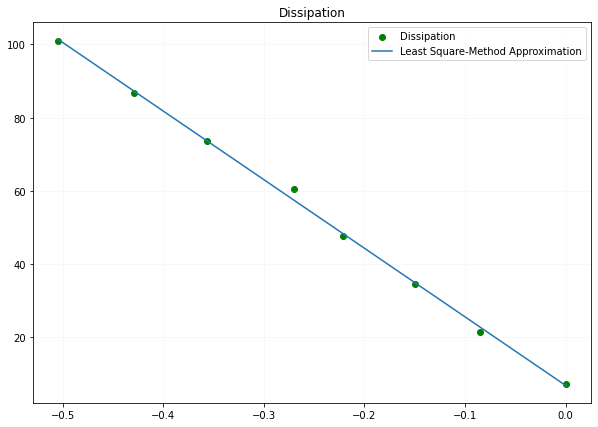

In [8]:
plt.figure(figsize = (10, 7))
plt.scatter(np.log(np.array(peaks_y_2) / peaks_y_2[0]), peaks_x_2, label = 'Dissipation', color = 'green')
k = np.polyfit(np.log(np.array(peaks_y_2) / peaks_y_2[0]), peaks_x_2, deg = 1)
yn = np.poly1d(k)
plt.plot(np.log(np.array(peaks_y_2) / peaks_y_2[0]),yn(np.log(np.array(peaks_y_2) / peaks_y_2[0])), label = 'Least Square-Method Approximation')
plt.title('Dissipation')
print(k[0], 1/k[0])
plt.legend()
plt.grid(alpha = 0.1)